In [42]:
from sklearn.datasets import load_iris
import numpy as np

In [5]:
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [25]:
print iris.target.shape

(150L,)


In [29]:
X = iris.data
y = iris.target


In [31]:
print X.shape
print y.shape

(150L, 4L)
(150L,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)

In [37]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [39]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [75]:
test = np.array([1, 2, 3, 4])
y_pred = knn.predict(X)

In [76]:
from sklearn import metrics


In [80]:
metrics.accuracy_score(y,y_pred)

1.0

In [82]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X,y)
y_pred = knn_5.predict(X)
metrics.accuracy_score(y,y_pred)

0.96666666666666667

In [86]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)
metrics.accuracy_score(y,y_pred)

0.95999999999999996

In [88]:
from sklearn.cross_validation import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state= 4)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print 'logistic:\t', metrics.accuracy_score(y_test,y_pred)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print '1-nn:\t', metrics.accuracy_score(y_test,y_pred)

knn_5.fit(X_train,y_train)
y_pred = knn_5.predict(X_test)
print '5-nn:\t', metrics.accuracy_score(y_test,y_pred)

logistic:	0.95
1-nn:	0.95
5-nn:	0.966666666667


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state= 4)

k_array = np.arange(1,27)
scores = np.array([])

for k in k_array:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    scores = np.append(scores,acc)
    

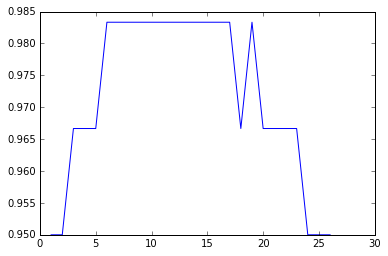

In [129]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_array, scores)

## Adversting data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


In [97]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


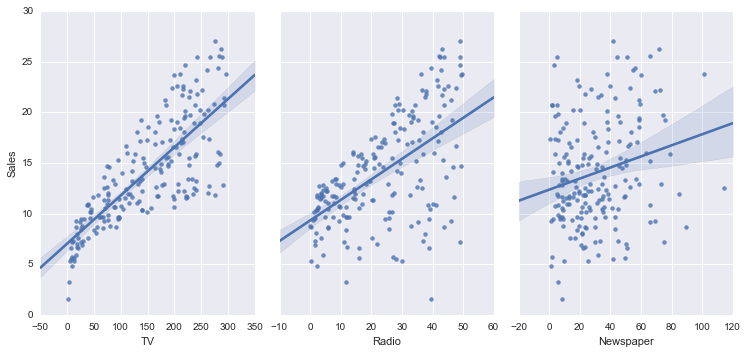

In [5]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=5, aspect=.7, kind='reg')

In [44]:
features = ['TV','Radio']
X = data[features]
y = data['Sales']

In [45]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [46]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print linReg.intercept_
print linReg.coef_

zip(features,linReg.coef_)

2.92723732027
[ 0.04660234  0.18117959]


[('TV', 0.046602340710768547), ('Radio', 0.18117959203112891)]

In [48]:
y_pred = linReg.predict(X_test)

In [50]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.3879034699382886

# Cross-validation stuff

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%matplotlib inline

In [108]:
iris = load_iris()
X = iris.data
y = iris.target

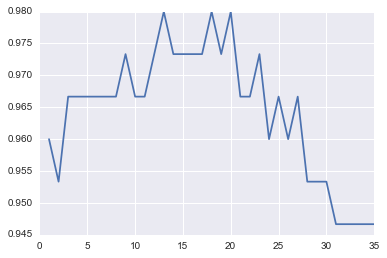

In [111]:
k_array = np.arange(1,36)
scores = np.array([])

for k in k_array:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = np.append(scores, cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
plt.plot(k_array, scores)

In [114]:
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.98


In [116]:
logreg = LogisticRegression()
print cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.953333333333


In [2]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


** Mean squared error metric using cross_val_score is negative (when used by other methods: can just use maximum) **


In [122]:
features = ['TV','Radio', 'Newspaper']
X = data[features]
y = data['Sales']

linReg = LinearRegression()
print np.sqrt(-cross_val_score(linReg, X, y, cv=10, scoring='mean_squared_error')).mean()

1.69135317081


In [3]:
features = ['TV','Radio']
X = data[features]
y = data['Sales']

linReg = LinearRegression()
print np.sqrt(-cross_val_score(linReg, X, y, cv=10, scoring='mean_squared_error')).mean()

1.67967484191


In [4]:
from sklearn.grid_search import GridSearchCV

In [12]:
iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier()

In [13]:
param_grid = dict(n_neighbors = range(1,37), weights = ['distance', 'uniform'])

In [33]:
gs = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [35]:
import timeit

start = timeit.time.time()
gs.fit(X,y)
end = timeit.time.time()
print end-start



2.23599982262


In [36]:
print gs.best_score_
print gs.best_params_
print gs.best_estimator_

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
